#####     Introduction to Data Exploration using Hip-Hop Lyrics

Welcome to an innovative way of teaching and sharing the delights that comes when data, computational methods and culture collide. The goal of this lab is to connect cultural relevance to computing by introducing elementary techniques of natural language processing with a corpus of hip-hop data.


Art is something that we often believe that is separate from the so-called hard sciences. As a result, those of people who are gifted in the arts or are inclined in that direction, shy away from the sciences because many fall prey to the false choice of choosing between the arts or the sciences.


We want to change this false dichotomy by bringing the power of computational methods to investigate and explore the riches that are inherent in the arts. It is for this reason that we have chosen to use a corpus of hip-hop lyrics as the dataset on which we will practice our computational techniques. At the end of this lab you will be able to build a visualization of the occurrence of certain words in a rap corpus.


One of the reasons why Python is loved is that it is a language that lends itself well to things like building webapps as well as ``hardcore" computational science like calculating the orbits of planets and stuff like that. What we are interested in, is doing a bit of data manipulation based on a hip-hop corpus. We are going to be doing something similar to what Matt Daniels did with the hip-hop vocabulary. We are going to get under the hood and create our own hypothesis.



In [3]:
from IPython.display import HTML
HTML('<iframe src=http://www.npr.org/2014/05/05/309840473/yeezy-or-the-bard-whos-the-best-wordsmith-in-hip-hop width=700 height=500></iframe>')


If you read this article, you will see that Matt used the first 35,000 lyrics of each artist. For the sake of If you read the article, you will see that Matt used the first 35,000 lyrics of each artist. For the sake of simplicity, I am going to use the artist Jay Z as the subject of our analysis. So let's go and collect the first 35,000 words of the Jay Z lyrical catalog.

How are we going to do this you might ask? Well first off, you can go to your favorite search engine and search for Jay Z lyrics. On the other hand, you can actually use the rap annotation site genius(http://rap.genius.com/) to get all that information and then some. According to Genius, Jay Z has a lot of songs. On average, most rap songs are usually set with 3 verses containing sixteen bars, or sixteen sentences each. 

```python
35000/(16 * 3) 
729
```

So if 16 by 3 = 48, and 48 goes into 35000 gives approximately 729 songs. That can't be right, even though Jay Z is prolific, he hasn't written 700+ songs. So I must have gotten my understanding wrong.

In [39]:
35000/(16 * 3) 

729

I proceeded under the false assumption that each lyric was a sentence. Now I can see that each lyric must mean each word instead. This brings me to an essential quality of a good problem solver and Computer Scientist, the ability to embrace failure. More on that later. So lets go back and re-analyze the numbers. I need to figure out how many words are in the average rap bar?


In order to solve this we need to basically find every instance of Jay Z's lyric, scrape them off the Internet, and then start number crunching on them. To make this process faster, I have already built something called a webscraper and scraped all his lyrics till the Holy Grail album. Hopefully that gives us more than enough data to get to 35,000 words.


The lyrics I scraped off the Internet have been compressed in the zip file named `JayZ.zip.' Go ahead an unpack this file to our PythonDataLab folder. Take a look inside, you will see its made up of a bunch of text files. Take sometime and go through some the text file to see what they look like. For example the file ``JayZ\_The Black Album\_99 Problems.txt" contains the lyrics to 99 problems.


Now that we have these files, we are going to use some Python packages (a package is also known as a library) to help us. The Python natural language toolkit (NLTK) is one of the more popular Python libraries that people use for natural language processing. In fact, Matt Daniels used it for his hip-hop vocabulary. You can learn more about NLTK here, http://www.nltk.org/book/. 

So lets import the toolkit. Go ahead a fire up Python in terminal. To import any package in Python, you type in the keyword import, followed by the name of the toolkit.


In [40]:
import nltk

The nltk library has a lot of functions associated with it. The one we are going to use in particular is called a Corpus reader. If you look up the definition of a corpus, you will see that it is just a collection of written text. The JayZ folder contains a corpora of Jay Z lyrics. The great thing about nltk is that it comes with built-in support for dozens of corpora. For example, NLTK includes a small selection of texts from Project Gutenberg, which contains some 25,000 free electronic books. To see some of these books we can run the following query

In [41]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [42]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'JayZ'
wordlist = PlaintextCorpusReader(corpus_root, '.*')

Ah, there is Shakespeare's *Macbeth*, *Hamlet*, as well as *Julius Cesar*. There is also the King James version of the bible as well as Jane Austen's Emma. Let's get on to the business of making our JayZ corpus.

Based on my perusal of the nltk book, I know that there is a plaintext corpus reading function named PlaintextCorpusReader that I can use to make my corpus. So from nltk corpus function, which I access through the '.' (dot) operator, I import PlaintextCorpusReader

```python 
from nltk.corpus import PlaintextCorpusReader
```

I create a variable that I name corpus_root and assign the full system path location to where I unzipped the JayZ file I downloaded.

```python
corpus_root = 'JayZ'
```

I then call the plain text corpus reader function with the root location and the token "'.'" that means grab every file in that folder. 
```python
wordlist = PlaintextCorpusReader(corpus_root, '.*')
```

I have adapted a function from nltk to reading in my corpus. This function is below. In order to make this function work, we will need to get some additional libraries of functions. In this case, we will need the regular expressions library named "re". So the first thing we need to do is import that package.


In [43]:
import re

"""
This function takes in an object of the type PlaintextCorpusReader, and system path.
It returns an nltk corpus

It requires the regular expression package re to work
"""

def create_corpus(wordlist, some_corpus): #process the files so I know what was read in
    for fileid in wordlist.fileids():
        raw = wordlist.raw(fileid)
        raw = re.split(r'\W+', raw) ## split the raw text into appropriate words 
        ## while I am cleaning up, I should strip out the word chorus followed by the next word
        some_corpus.extend(raw)
        print fileid

    return some_corpus

The function does something then you type in the following 
```python
the_corpus = create_corpus(wordlist, []) 
```
Now `the_corpus` contains all the lyrics. I wrote the `create_corpus` function in a way that shows what lyrics were read in. You should have a similar output to the one below.

The series of words that make up Jay Z's lyrics is now represented by a list data structure, named `the_corpus`. This list data structure is the same exact computational mental model that we have already acquired with the list data structure we are already familiar with in Snap*!*. Hopefully, you are beginning to gain a better understanding of how all the computational thinking skills you acquired in your learning of Snap*!* carries over to solving any computation problem realized in any programming language.


In [44]:
the_corpus = create_corpus(wordlist, []) 

JayZ_American Gangster_American Dreamin.txt
JayZ_American Gangster_American Gangster.txt
JayZ_American Gangster_Blue Magic.txt
JayZ_American Gangster_Fallin.txt
JayZ_American Gangster_Hello Brooklyn 20.txt
JayZ_American Gangster_I Know.txt
JayZ_American Gangster_Ignorant Shit.txt
JayZ_American Gangster_Intro.txt
JayZ_American Gangster_No Hook.txt
JayZ_American Gangster_Party Life.txt
JayZ_American Gangster_Pray.txt
JayZ_American Gangster_Say Hello.txt
JayZ_American Gangster_Success.txt
JayZ_American Gangster_Sweet.txt
JayZ_Collision Course_Big Pimpin  Papercut.txt
JayZ_Collision Course_Dirt Off Your Shoulder  Lying From You.txt
JayZ_Collision Course_Izzo  In The End.txt
JayZ_Collision Course_Jigga What  Faint.txt
JayZ_Collision Course_Numb  Encore.txt
JayZ_Collision Course_Points Of Authority  99 Problems  One Step Closer.txt
JayZ_In My Lifetime Vol. 1_Face Off.txt
JayZ_In My Lifetime Vol. 1_Friend Or Foe '98.txt
JayZ_In My Lifetime Vol. 1_I Know What Girls Like.txt
JayZ_In My Lifetime

In [45]:
len(the_corpus)

119302

We have finally gotten our Jay Z Corpus! The data that we collected has a 119,302 words. You can see for yourself by running the `len` (Python function for figuring out the length of a list) on `the_corpus`. This is great, because we are interested in the first 35,000 words of the corpora, in order to recreate the data science experiment of the hip-hop vocabulary; which determines the number of unique words used within an artist's first 35,000 lyrics.


The corpus is stored in a list data structure, which lends itself to list manipulation techniques. You can see all the ways you can interact with a list in the Python documentation here https://docs.Python.org/2/tutorial/datastructures.html.

Did you know that 80-90% of time spent on data projects is gathering data and putting it into a format you can analyze? Geez

Let's take a look inside `the_corpus`, to determine what the first 10 words are.

In [46]:
the_corpus[:10]

['Dreamed',
 'of',
 'you',
 'this',
 'morning',
 'Then',
 'came',
 'the',
 'dawn',
 'and']

Here's a little secret: much of NLP (and data science, for that matter) boils down to counting things. If you've got a bunch of data that needs analyzin' but you don't know where to start, counting things is usually a good place to begin. Sure, you'll need to figure out exactly what you want to count, how to count it, and what to do with the counts, but if you're lost and don't know what to do, just start counting. Some of this content has been adapted from Charlie Greenbacker's [A smattering of NLP in Python][1]

These words come from the first text file that was read in, JayZ_American Gangster_American Dreamin.txt. We can go ahead and save all the album titles by typing in `Albums = wordlist.fileids()`


  [1]: http://nbviewer.ipython.org/github/charlieg/A-Smattering-of-NLP-in-Python/blob/master/A%20Smattering%20of%20NLP%20in%20Python.ipynb        "A smattering of NLP in Python"


In [48]:
Albums = wordlist.fileids()
Albums[:14]
[fileid for fileid in Albums[:14]]

['JayZ_American Gangster_American Dreamin.txt',
 'JayZ_American Gangster_American Gangster.txt',
 'JayZ_American Gangster_Blue Magic.txt',
 'JayZ_American Gangster_Fallin.txt',
 'JayZ_American Gangster_Hello Brooklyn 20.txt',
 'JayZ_American Gangster_I Know.txt',
 'JayZ_American Gangster_Ignorant Shit.txt',
 'JayZ_American Gangster_Intro.txt',
 'JayZ_American Gangster_No Hook.txt',
 'JayZ_American Gangster_Party Life.txt',
 'JayZ_American Gangster_Pray.txt',
 'JayZ_American Gangster_Say Hello.txt',
 'JayZ_American Gangster_Success.txt',
 'JayZ_American Gangster_Sweet.txt']

In [50]:
the_corpus[34990:35000]

['die', 'And', 'even', 'if', 'Jehovah', 'witness', 'bet', 'he', 'll', 'never']

We can now go ahead and figure out the number of unique words used in Jay Z's first 35,000 lyrics. An astute observer will notice that we have not done any data cleaning. For example, take a look inside a slice of the corpus, the last 10 words `the_corpus[34990:35000]`, `['die', 'And', 'even', 'if', 'Jehovah', 'witness', 'bet', 'he', 'll', 'never']`, you will see it has treated the contraction "I'm" as two separate words. The `create_corpus` function that we used, works by separating each contiguous chunk of alphabets separated by punctuations or space as a word. As a result contractions like "I'm" gets treated as two words. We can use the function `lexical_diversity` to determine the number of unique words in our Jay Z corpus.

In [51]:
def lexical_diversity(my_text_data):
...     word_count = len(my_text_data)
...     vocab_size = len(set(my_text_data))
...     diversity_score = word_count / vocab_size
...     return diversity_score

If we call our function on the Jay Z sliced corpus, it should give us a score.

In [52]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

print "The lexical diversity score for the first 35,000 words in the Jay Z corpus is ", lexical_diversity(the_corpus[:35000])
print "The lexical diversity score for the first 35,000 words in the Emma corpus is ", lexical_diversity(emma[:35000])



The lexical diversity score for the first 35,000 words in the Jay Z corpus is  6
The lexical diversity score for the first 35,000 words in the Emma corpus is  10



Remember we had created a `wordlist` of type `PlaintextCorpusReader`. This uses the data structure of a nested list. 
PlaintextCorpusReader type is made up of a list of fileids, which are made up of a list of paragraphs, which are in turn made up of a list of sentences, which are in turn made up of a list of words.

- `words()`: list of str
- `sents()`: list of (list of str) 
- `paras()`: list of (list of (list of str)) 
- `fileids()`: list of (list of (list of (list of str)))

In this section, lets investigate the use of basketball language in Jay Z's lyrics. Go ahead and save all the album titles by typing in `Albums = wordlist.fileids()`. Notice that JayZ_ text appears before each of the filenames. To get this prefix out of the filename, we can extract the first five characters, using `fileid[5:]`.

Here's a little secret: much of NLP (and data science, for that matter) boils down to counting things. If you've got a bunch of data that needs analyzin' but you don't know where to start, counting things is usually a good place to begin. Sure, you'll need to figure out exactly what you want to count, how to count it, and what to do with the counts, but if you're lost and don't know what to do, just start counting. 

In [53]:
[fileid[5:] for fileid in Albums[:14]]

['American Gangster_American Dreamin.txt',
 'American Gangster_American Gangster.txt',
 'American Gangster_Blue Magic.txt',
 'American Gangster_Fallin.txt',
 'American Gangster_Hello Brooklyn 20.txt',
 'American Gangster_I Know.txt',
 'American Gangster_Ignorant Shit.txt',
 'American Gangster_Intro.txt',
 'American Gangster_No Hook.txt',
 'American Gangster_Party Life.txt',
 'American Gangster_Pray.txt',
 'American Gangster_Say Hello.txt',
 'American Gangster_Success.txt',
 'American Gangster_Sweet.txt']

We are ready to start mining the data. So let's do a simple analysis on the occurrence of the concept "basketball" in JayZ's lyrics as represented by a list of 40 terms that are common when we talk about basketball.

In [54]:
basketball_bag_of_words = ['bounce','crossover','technical',
 'shooting','double','jump','goal','backdoor','chest','ball',
 'team','block','throw','offensive','point','airball','pick',
 'assist','shot','layup','break','dribble','roll','cut','forward',
 'move','zone','three-pointer','free','post','fast','blocking','backcourt',
 'violation','foul','field','pass','turnover','alley-oop','guard']

Lets reduce our investigation of this concept to just the American Gangster album, which is the first 14 songs in the corpus. We do that by using the command `Albums[:14]`. Remember that `Albums` is just a list data type, so we can slice it, to its first 14 indexes.


The following code converts the words in the basket ball concept to lowercase using `w.lower()`, then checks if they start with any of the "targets", that is, each of the words in the `basketball_bag_of_words`, using the command `startswith()`. Thus, it will count words like "turnover," "alley-oop" and so on. All this is enabled by NLTK's built in function for Conditional Frequency Distribution. You can read more about it [here](http://www.nltk.org/book/ch02.html#fig-tally2).

In [55]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[5:])
           for fileid in Albums[:14]
           for w in wordlist.words(fileid)
           for target in basketball_bag_of_words
           if w.lower().startswith(target))

In [59]:
# have inline graphs
get_ipython().magic(u'matplotlib inline')

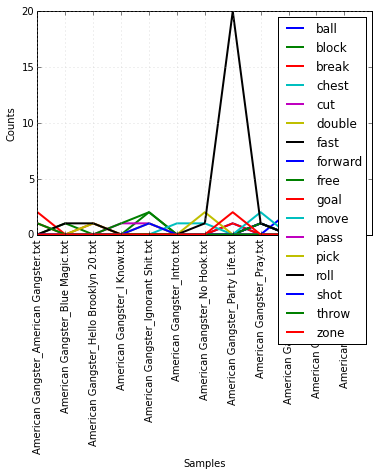

In [60]:
cfd.plot()

From the plot we see that the basketball term "roll" seems to be used extensively in the song *Party Life*. Let's take a closer look at this phenomenon, and determine if "roll" was used in the "basketball" sense of the term. To do this, we need to see the context in which it was used. What we really need is a concordance. Let's build one.

The first thing I want to do is to create a corpus that only contain words from the American Gangster album.

In [62]:
AmericanGangster_wordlist = PlaintextCorpusReader(corpus_root, 'JayZ_American Gangster_.*') 
AmericanGangster_corpus = create_corpus(AmericanGangster_wordlist, []) 

JayZ_American Gangster_American Dreamin.txt
JayZ_American Gangster_American Gangster.txt
JayZ_American Gangster_Blue Magic.txt
JayZ_American Gangster_Fallin.txt
JayZ_American Gangster_Hello Brooklyn 20.txt
JayZ_American Gangster_I Know.txt
JayZ_American Gangster_Ignorant Shit.txt
JayZ_American Gangster_Intro.txt
JayZ_American Gangster_No Hook.txt
JayZ_American Gangster_Party Life.txt
JayZ_American Gangster_Pray.txt
JayZ_American Gangster_Say Hello.txt
JayZ_American Gangster_Success.txt
JayZ_American Gangster_Sweet.txt


Building a concordance, gets us to the area of elementary information retrieval (IR)<a href="#fn1" id="ref1">1</a>, think, <i> basic search engine</i>. So why do we even need to “normalize” terms? We want to match <b>U.S.A.</b> and <b>USA</b>. Also when we enter <b>roll</b>, we would like to match <b>Roll</b>, and <b>rolling</b>. One way to do this is to stem the word. That is, reduce it down to its base/stem/root form. As such <b>automate(s)</b>, <b>automatic</b>, <b>automation</b> all reduced to <b>automat</b>. Most stemmers are pretty basic and just chop off standard affixes indicating things like tense (e.g., "-ed") and possessive forms (e.g., "-'s"). Here, we'll use the most popular english language stemmer, the Potter stemmer, which comes with NLTK. 

Once our tokens are stemmed, we can rest easy knowing that roll, Rolling, Rolls will all stem to roll.

<sup id="fn1">1. Some of this content has been adapted from Dan Jurafsky's <a href="https://web.stanford.edu/class/cs124/">Stanford CS124 class</a><a href="#ref1" title="Jump back to footnote 1 in the text."></a></sup>

In [66]:
porter = nltk.PorterStemmer()

stemmer = nltk.PorterStemmer()
stemmed_tokens = [stemmer.stem(t) for t in AmericanGangster_corpus]

for token in sorted(set(stemmed_tokens))[860:870]:
    print token + ' [' + str(stemmed_tokens.count(token)) + ']'


dummi [1]
dump [1]
dure [1]
each [1]
earlob [1]
eas [1]
easel [1]
easi [1]
easili [1]
eat [5]


    
Now we can go ahead and create a concordance to test if "roll" is used in the basketball (pick and roll) sense or not.

In [67]:
AmericanGangster_lyrics = IndexedText(porter, AmericanGangster_corpus)
AmericanGangster_lyrics.concordance('roll')

 in my veins like a pisces The Pyrex pot rolled up my sleeves Turn one into two l
dinner s now turn in to Breakfast I only roll Lexus to Hug your road I love your 
ut I do lift Weight like I m using roids Rolls Royce Keep my movements smooth whi
 lefty Gangster effortlessly Poppa was a rolling stone its in my ancestry I m in 
babe I got a slick mouth you might wanna    roll with me I m on her bra strap she
ike CASINO They should pay me for some B roll Takin G strolls through the ghee to
n lets keep it smooth This that shit you  roll up like a little tight J to Sip ya
her s afro as momma taps her toes as she rolls her jays and my poppa just left th


In [79]:
print AmericanGangster_wordlist.raw(fileids='JayZ_American Gangster_Party Life.txt')

Oh... 
I like the party life... 
Break Out The Red Lights 
The city in bright lights 
Welcome To The Party Life 
These girls dressin' skintight... 
Welcome to the 70's--Sweet! 
 
Ordered some Patreezy 
While talkin' to this breezy 
Brushin' off my three-piece, I make this look too easy 
So tall and lanky, my suit? 
It should thank me 
I make it look good to be this hood, 
Meyer Lansky mixed with lucky lefty 
Gangster, effortlessly 
Poppa was a rolling stone-its in my ancestry 
I'm in a whole 'nother league, niggas never catch me 
And I sport fly shit, I should win the ESPY 
 
(Baby I, I said I sport fly shit, I should win the Espy.... 
I'm really in another league, babe....... 
I got a slick mouth, you might wanna roll with me,) 
 
I'm on her bra strap, she's on my dick 
Ain't nothin' wrong with that, that's my bitch 
I be the boss of that, I'm on her shit 
So all you niggas fall back, I'll split ya wig 
She's my little quarterback ....ya dig? 
Cause I'm all that in the sack ....ya, ya

Based on the context, you can decide if the word "roll" is used in a basketball sense. This is really where the "art" of the word "Arts and Sciences" comes to play in Data Science and NLP.